# Exercise 1: The Ground State

In this exercise the method of finding the ground state energy and wavefunction for a general time independent hamiltonian $\hat{H}$ by numerically evaluating the path integral is examined. It is then applied to the harmonic and anharmonic oscillator potentials. The python package vegas is used to evaluate the integrals.

### The Euclidean Propagator


Starting with the the standard propagator of quanum mechanics with $\hbar=1$.

$$\big\langle \psi_f \big| e^{-i\hat{H}(t_f-t_i)} \big| \psi_i \big\rangle$$ 

which is the amplitude for the state $\big| \psi_i \big\rangle$ to evolve into state $\big| \psi_f \big\rangle$ in a time $T=t_f-t_i$.

We make a 'wick' rotatation where we transform $it \to t$ to obtain the euclidean propagator. 

$$\big\langle \psi_f \big| e^{-T\hat{H}} \big| \psi_i \big\rangle$$

The calculations are done in imaginary time but the answers will be time-independent. Choosing two different complete sets of states will allow us to obtain two important representations of the euclidean propagator. 

### Hamiltonian Eigenstate Representation


Inserting a complete set of eigenstates of the hamiltonian, $\sum_n \big| n \big\rangle \big\langle n \big| = \mathbf{I} $

\begin{eqnarray*}
\big\langle \psi_f \big| e^{-T\hat{H}} \big| \psi_i \big\rangle = \sum_n \big\langle \psi_f \big| n \big\rangle \big\langle n \big| \psi_i \big\rangle \ e^{-TE_n}
\end{eqnarray*}

Taking a closed evolution where $\big| \psi_f \big\rangle = \big| \psi_i \big\rangle = \big| \psi \big\rangle$ 

\begin{eqnarray*}
\big\langle \psi \big| e^{-T\hat{H}} \big| \psi \big\rangle &=& \sum_n \big|\langle \psi \big| n \big\rangle \big|^2 \  e^{-TE_n}
\end{eqnarray*}

In the limit where $T \to \infty$ the sum will be dominated by the smallest $E_n$ i.e. $E_0$. This leads to the first formula of interest for this exercise.

\begin{eqnarray*}
\lim_{T \to \infty} \big\langle \psi \big| e^{-T\hat{H}} \big| \psi \big\rangle &=& \big| \big\langle \psi \big| 0 \big\rangle \big|^2 \ e^{-TE_0} 
\end{eqnarray*}

Demanding that $\big| \psi \big\rangle$ belongs to a continuous complete set of states i.e. $\int d\psi \big| \psi \big\rangle \big\langle \psi \big| = \mathbf{I}$

\begin{eqnarray*}
\mathbf{Z} = \mathbf{Tr}\left[e^{-T\hat{H}} \right] = \int d \psi \big\langle \psi \big| e^{-T\hat{H}} \big| \psi \big\rangle &=& \sum_n e^{-TE_0} 
\end{eqnarray*}

This is known as the partition function due to it's similarity to the partition function from statistical mechanics with time $\sim$ inverse temperature. Once again taking the limit the next formula of interest is obtained.

\begin{eqnarray*}
\lim_{T \to \infty} \int d \psi \big\langle \psi \big| e^{-T\hat{H}} \big| \psi \big\rangle &=& e^{-TE_0} 
\end{eqnarray*}




### Position and Momentum Eigenstate Representation

The two corresponding formulas will now be derived using eigenstates of the positon operator $\hat{X}$ and momentum operator $\hat{P}$. Our hamiltonian has the general form  $\hat{H} = \frac{\hat{P}^2}{2m} + V(\hat{x})$. Setting $\big| \psi \big\rangle = \big| x \big\rangle$ and inserting $\int dp \big| p \big\rangle \big\langle p \big| = \mathbf{I}$

\begin{eqnarray*}
\big\langle x_f \big| e^{-T\hat{H}} \big| x_i \big\rangle = \int dp \ \big\langle x_f \big| p \big\rangle \big\langle p \big| e^{-T\left(\frac{\hat{P}^2}{2m} + V(\hat{x})\right)} \big| x_i \big\rangle
\end{eqnarray*}

$\hat{P}$ and $\hat{X}$ do not commute which means 

\begin{eqnarray*}
e^{-T\left(\frac{\hat{P}^2}{2m} + V(\hat{X})\right)} \neq e^{-T\frac{\hat{P}^2}{2m}} e^{-TV(\hat{x})} 
\end{eqnarray*}

The equality does however hold to first order i.e. infinitesimal time steps. Transforming $T \to a$ where $a= \frac{T}{N}$, $N \to \infty$ and using $\langle x | p \rangle = \frac{1}{\sqrt{2\pi}}e^{ipx}$.

\begin{eqnarray*}
\big\langle x_{j+1} \big| e^{-a\hat{H}} \big| x_j \big\rangle = \int dp \ \big\langle x_{j+1} \big| p \big\rangle \big\langle p \big| e^{-a\left(\frac{\hat{p}^2}{2m} + V(\hat{x})\right)} \big| x_j \big\rangle &=& \int dp \ e^{-a\frac{p^2}{2m}}e^{-aV(x_j)} \ \big\langle x_{j+1} \big| p \big\rangle \big\langle p \big| x_j \big\rangle \\
&=& \frac{1}{2\pi}\int dp \ e^{-a\frac{p^2}{2m}}e^{ip(x_{j+1}-x_j)}e^{-aV(x_j)}
\end{eqnarray*}

Where the initial and final states $x_j$ and $x_{j+1}$ are infinitesimally close. Preforming the gaussian integral

\begin{eqnarray*}
\frac{1}{2\pi}\int dp \ e^{-\frac{a}{2m}p^2 + i(x_{j+1}-x_j)p} e^{-aV(x_j)} = \sqrt{\frac{m}{2\pi a}}e^{-\frac{m}{2a}(x_{j+1}-x_j)^2} e^{-aV(x_j)}
\end{eqnarray*}

The Trotter formula tells us that

\begin{eqnarray*}
e^{-T\hat{H}}  = \lim_{N \to \infty} (e^{-a\hat{H}})^N
\end{eqnarray*}

Which can be used to build a finite path out of our infinitesimal formula

\begin{eqnarray*}
\left\langle x_f \left| e^{-T\hat{H}} \right| x_i \right\rangle &=& \lim_{N \to \infty} \left\langle x_N \left| (e^{-a\hat{H}})^N \right| x_0 \right\rangle \\
\end{eqnarray*}

Where $x_f$ and $x_i$ are relabeled to match the infinitesimal labelling. Inserting $N-1$ copies of $\int dx \left| x \right\rangle \left\langle x \right| = \mathbf{I}$

\begin{eqnarray*}
 \lim_{N \to \infty} \left\langle x_N \left| (e^{-\hat{H}a})^N \right| x_0 \right\rangle &=& \lim_{N \to \infty} \int dx_{N-1}...dx_1  \big\langle x_N \big| e^{-\hat{H}a} \big| x_{N-1} \big\rangle ... \big\langle x_1 \big| e^{-\hat{H}a} \big| x_0 \big\rangle \\
&=& \lim_{N \to \infty} \left(\frac{m}{2\pi a}\right)^{\frac{N}{2}} \int dx_{N-1}...dx_1 \ e^{-\frac{m}{2a}(x_N-x_{N-1})^2} e^{-aV(x_{N-1})}...e^{-\frac{m}{2a}(x_{1}-x_0)^2} e^{-aV(x_0)} \\
&=& \lim_{N \to \infty} \left(\frac{m}{2\pi a}\right)^{\frac{N}{2}} \int dx_{N-1}...dx_1 \ e^{-a\left(\sum_{j=0}^{N-1}\frac{m}{2}\left(\frac{(x_{j+1}-x_j)}{a}\right)^2+V(x_j)\right)}
\end{eqnarray*}



### The Path Integral 

Taking a brief interlude to make an important observation. By making the identifications:

\begin{eqnarray}
\frac{(x_{j+1}-x_j)}{a} &=& \dot{x}(t) + \mathcal{O}(a) \text{  with  } t=ja \\
a\sum_{j=0}^{N-1} &=& \int_0^T dt ... + \mathcal{O}(a) \text{  with  } T=Na \\
\end{eqnarray}

It can be seen that

\begin{eqnarray}
a\sum_{j=0}^{N-1} \left(\frac{m}{2}\left(\frac{(x_{j+1}-x_j)}{a}\right)^2+V(x_j)\right) = \int_0^T dt\  \left(\frac{m}{2} \dot{x}(t)^2 + V(x(t))\right) + \mathcal{O}(a)
\end{eqnarray}

The expression on the right is the Euclidean action $S_E$ obtained by wick rotating the usual action $S$. Making the further identifcations

\begin{eqnarray}
\left(\frac{m}{2\pi a}\right)^{\frac{N}{2}} \int dx_{N-1}...dx_1 = \int \mathcal{D}x(t) + \mathcal{O}(a) 
\end{eqnarray}

where $\int \mathcal{D}x(t)$ is an integral over all possible paths. Giving

\begin{eqnarray}
\left(\frac{m}{2\pi a}\right)^{\frac{N}{2}} \int dx_{N-1}...dx_1 \ e^{-a\left(\sum_{j=0}^{N-1}\frac{m}{2}\left(\frac{(x_{j+1}-x_j)}{a}\right)^2+V(x_j)\right)} = \int \mathcal{D}x(t)\ e^{-S} + \mathcal{O}(a)
\end{eqnarray}

Which is a discretization of a wick rotated path integral.

### Putting it together

Our two equivalent representations of our euclidean propagator

\begin{eqnarray*}
\big\langle x_N \big| e^{-T\hat{H}} \big| x_0 \big\rangle  = \lim_{N \to \infty} \left(\frac{m}{2\pi a}\right)^{\frac{N}{2}} \int dx_{N-1}...dx_1 \ e^{-a\left(\sum_{j=0}^{N-1}\frac{m}{2}\left(\frac{(x_{j+1}-x_j)}{a}\right)^2+V(x_j)\right)} = 
\sum_n \big\langle x_N \big| n \big\rangle \big\langle n \big| x_0 \big\rangle \ e^{-TE_n}
\end{eqnarray*}

For a closed evolution 

\begin{eqnarray*}
\big\langle x_0 \big| e^{-T\hat{H}} \big| x_0 \big\rangle  &=& \lim_{N \to \infty} \left(\frac{m}{2\pi a}\right)^{\frac{N}{2}} \int dx_{N-1}...dx_1 \ e^{-a\left(\sum_{j=0}^{N-1}\frac{m}{2}\left(\frac{(x_{j+1}-x_j)}{a}\right)^2+V(x_j)\right)} = 
\sum_n \big|\langle x_0 \big| n \big\rangle \big|^2 \  e^{-TE_n} \\
\mathbf{Tr}\left[e^{-T\hat{H}} \right] = \int dx_0\ \big\langle x_0 \big| e^{-\hat{H}T} \big| x_0 \big\rangle  &=& \lim_{N \to \infty} \left(\frac{m}{2\pi a}\right)^{\frac{N}{2}} \int dx_{N-1}...dx_0 \ e^{-a\left(\sum_{j=0}^{N-1}\frac{m}{2}\left(\frac{(x_{j+1}-x_j)}{a}\right)^2+V(x_j)\right)} = 
\sum_n \  e^{-TE_n}
\end{eqnarray*}

Where $x_N = x_0$ in the exponential sum. Taking the limit $T \to \infty$ gives the complete result for calculating the ground state energy and wavefunction.

\begin{eqnarray}
&\lim_{T \to \infty}& \lim_{N \to \infty} \left(\frac{m}{2\pi a}\right)^{\frac{N}{2}} \int dx_{N-1}...dx_1 \ e^{-a\left(\sum_{j=0}^{N-1}\frac{m}{2}\left(\frac{(x_{j+1}-x_j)}{a}\right)^2+V(x_j)\right)} = \big| \big\langle x_0 \big| 0 \big\rangle \big|^2 \  e^{-E_0T} \\
\lim_{T \to \infty} \mathbf{Tr}\left[e^{-T\hat{H}} \right] = &\lim_{T \to \infty}& \lim_{N \to \infty} \left(\frac{m}{2\pi a}\right)^{\frac{N}{2}} \int dx_{N-1}...dx_0 \ e^{-a\left(\sum_{j=0}^{N-1}\frac{m}{2}\left(\frac{(x_{j+1}-x_j)}{a}\right)^2+V(x_j)\right)} = e^{-E_0T}
\end{eqnarray}

# Numerical Implementation for Harmonic and Anharmonic Potentials

### Potentials

The python code below calculates  $\left|\langle x_0 \left| 0 \right\rangle \right|^2 \  e^{TE_0}$ and $e^{TE_0}$ for the one dimensional simple harmonic oscillator with potential

$$V(x) = \frac{x^2}{2}$$ 

and the anharmonic oscillator with potential 

$$V(x) = \frac{x^2}{2} + \frac{x^4}{2}$$

using the python *vegas* package.

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import vegas

%matplotlib inline

#Harmonic
def v_sho(x):
    
    return (x**2)/2

#Anharmonic
def v_aho(x):
    
    return (x ** 4)/2


### Integration of Equation (1)

In [70]:
def integrand_fixed_endpoints(x, x0, V, m, a, N):
    
    #End Points
    res =  (m/(2*a)) * (x[0]-x0)**2 + a * V(x0) 
    res += (m/(2*a)) * (x0-x[-1])**2 + a * V(x[-1])
    #Path Points
    res += (m/(2*a)) * np.sum((x[1:] - x[:-1])**2) + a * np.sum(V(x[:-1]))
    #Normalisation
    A = (m/(2 * np.pi * a))** (N/2)
    
    return A * np.exp(-1.0 * res)


def vegas_int_fixed(x0, V, m, a, N):
    
    lims = [[-5,5]]*(N-1)
    integ = vegas.Integrator(lims)
    func = partial(integrand_fixed_endpoints, x0 = x0, V=V, m = m, a = a, N = N)
    res = integ(func, nitn = 10, neval = 100000)
    
    return res.mean    

### Integration of Equation (2)

In [71]:
def integrand_full(x, V, m, a, N):
    
    #End Point
    res =  (m/(2*a)) * (x[0]-x[-1])**2 + a * V(x[-1]) 
    #Path Points
    res += (m/(2*a)) * np.sum((x[1:] - x[:-1])**2) + a * np.sum(V(x[:-1]))
    #Normalisation
    A = (m/(2 * np.pi * a))** (N/2)
    
    return A * np.exp(-1.0 * res)

def vegas_int_full(V, m, a, N):
    
    lims = [[-5,5]]*(N)
    integ = vegas.Integrator(lims)
    func = partial(integrand_full, V = V, m = m, a = a, N = N)
    res = integ(func, nitn = 10, neval = 100000).mean
    
    return res

### Analtytical Solution for Harmonic Oscillator

The ladder operator method or solving the wave equation PDE gives the energy levels of the harmonic oscillator as 

$$\hbar \omega (n+\frac{1}{2})$$

with $\omega$ set to one in the potential, hence $E_0 = 0.5$. 

Similarly the wave function is 

$$\big\langle x \big| n \big\rangle = \frac{2^n n!}{\sqrt{\pi}} e^{\frac{-x^2}{2}} H_n(x)$$

Where $H_n$ are the hermite polynomials. The ground state is then

$$\big\langle x \big| 0 \big\rangle = \frac{1}{\sqrt{\pi}}e^{\frac{-x^2}{2}}$$

So

$$\big| \big\langle x_0 \big| 0 \big\rangle \big|^2 \  e^{-TE_0} = \frac{1}{\pi}e^{-x_0^2}e^{-\frac{aN}{2}}$$

In [72]:
def analytic(x, a, N):
    
    x = np.array(x)
    
    return (np.exp(-1.0 * x**2)/np.sqrt(np.pi)) * np.exp(-1.0 * 1/2 * a * N)

### Analysis

In [73]:
def analysis(V, m, a, N, analytical = True):
    #Extract Ground State Energy E0
    expTE = vegas_int_full(V=V, m=m, a=a, N=N)
    E0 = -1.0*np.log(expTE)/(a*N)
    
    #Analytical Solutions for Comparison
    x0_list=np.linspace(0, 2, 10)
    psi2_analytical = np.exp(-x0_list ** 2) / np.sqrt(np.pi)
    prop_analytical = analytic(x0_list, a, N)
    
    #Numerical Solutions
    prop_numerical = np.empty(x0_list.shape)
    for i, x0 in enumerate(x0_list):
        prop_numerical[i] = vegas_int_fixed(x0=x0_list[i], V=V, m=m, a=a, N=N)
    
    psi2_numerical = prop_numerical / expTE
    
    #Plotting
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8), dpi=100, sharex=True)
    
    ax1.scatter(x0_list, prop_numerical, label = "Numerical Soln")
    ax1.set_ylabel(r"$|\psi(x)|^2 \  e^{-E_0T}$")
    ax1.set_title("Closed Euclidean Propagtor as a function of x0")
    ax1.set_xlim(0,2)
    ax1.set_ylim(0,0.1)
    ax1.legend()
    if analytical == True:
        ax1.plot(x0_list, prop_analytical, label = "Analytical Soln")
          
    
    ax2.scatter(x0_list, psi2_numerical, label = "Numerical Soln")
    ax2.set_xlabel("x0")
    ax2.set_ylabel(r"$|\psi(x)|^2$")
    ax2.set_title("Ground State Wave Function Squared")
    ax2.set_xlim(0,2)
    ax2.set_ylim(0,1)
    ax2.legend()
    if analytical == True:
        ax2.plot(x0_list, psi2_analytical, label = "Analytical Soln")
    
    print("Ground State Energy (E0):  " + str(E0))
    plt.show()

### Harmonic Oscillator Results

Results for harmonic oscillator with $m = 1$, $T =4$

Ground State Energy (E0):  0.491869248369


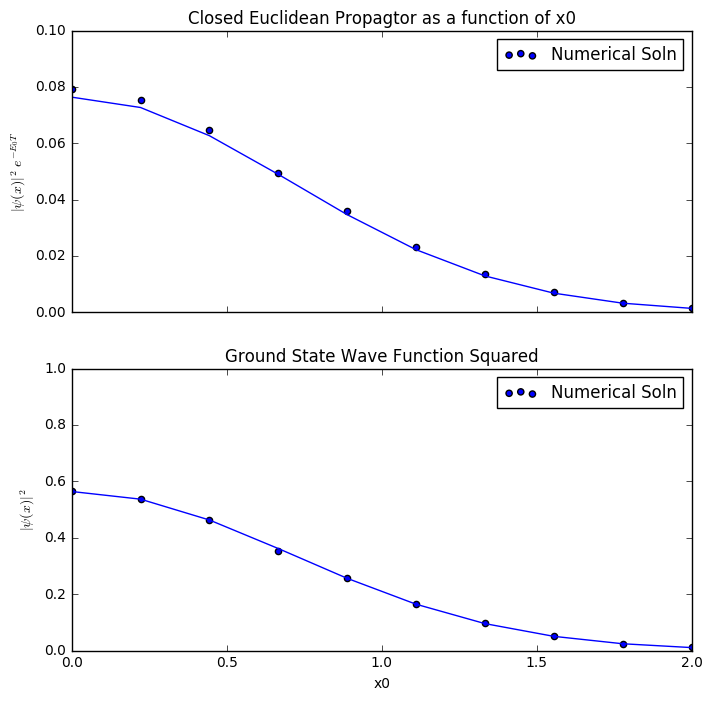

In [74]:
analysis(v_sho, 1, 0.5, 8)

The ground state energy and $\big|\psi(x) \big|^2$ agree well with the analytical solutions.

### Anharmonic Oscillator Results

Results for anharmonic oscillator with $m = 1$, $T =4$

Ground State Energy (E0):  0.512399653738


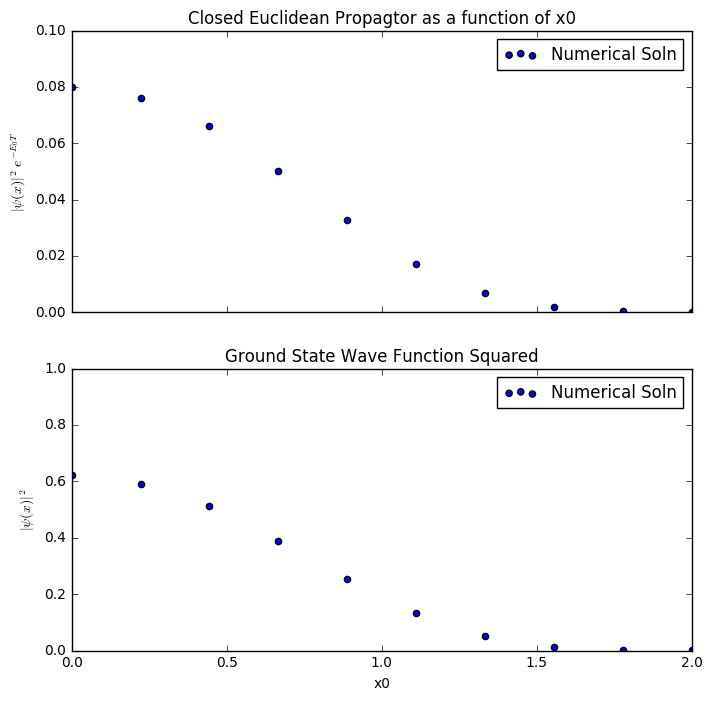

In [75]:
analysis(v_aho, 1, 0.5, 8, analytical = False)

#### Question

Why does limits above $[-5,5]$ mess things up so much.